In [78]:
#Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет
#на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
#Произведем разведовательный анализ данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [36]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [38]:
stud.rename(columns={'studytime, granular': 'granular'}, inplace=True)
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

In [39]:
pd.DataFrame(stud.school.value_counts())
#данные в норме

,school
GP,349
MS,46


In [25]:
pd.DataFrame(stud.sex.value_counts())
#данные в норме

,sex
F,208
M,187


In [26]:
pd.DataFrame(stud.address.value_counts())
#данные в норме

,address
U,295
R,83


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

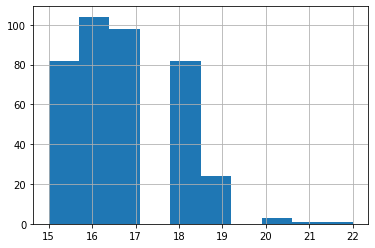

In [20]:
stud.age.hist()
stud.age.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

In [27]:
pd.DataFrame(stud.famsize.value_counts())
#Имеются незначительные пропуски в данных

,famsize
GT3,261
LE3,107


In [28]:
pd.DataFrame(stud.Pstatus.value_counts())
#Имеются незначительные пропуски в данных

,Pstatus
T,314
A,36


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

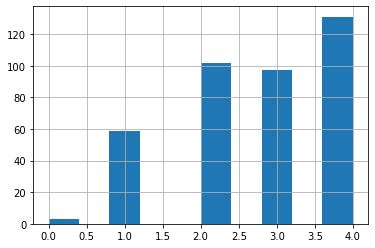

In [29]:
stud.Medu.hist()
stud.Medu.describe()
#Имеются незначительные пропуски в данных

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

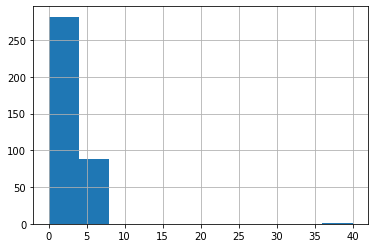

In [30]:
stud.Fedu.hist()
stud.Fedu.describe()

In [81]:
#Заменим ошибочные значения превышающие 4 на среднее значение
#(по условию:0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) 
def func(x):
    if x < 5:
        return x
    else:
        return stud.Fedu.median()


stud.Fedu = stud.Fedu.apply(func)

count    395.000000
mean       2.481013
std        1.059891
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

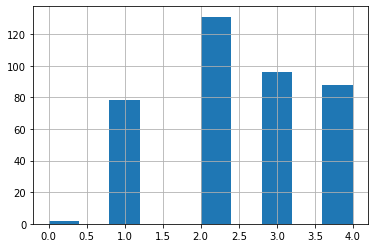

In [44]:
stud.Fedu.hist()
stud.Fedu.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

In [46]:
pd.DataFrame(stud.Mjob.value_counts())
#Имеются незначительные пропуски в данных

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [47]:
pd.DataFrame(stud.Fjob.value_counts())
#Имеются незначительные пропуски в данных

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [48]:
pd.DataFrame(stud.reason.value_counts())
#Имеются незначительные пропуски в данных

,reason
course,137
home,104
reputation,103
other,34


In [49]:
pd.DataFrame(stud.guardian.value_counts())
#

,guardian
mother,250
father,86
other,28


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

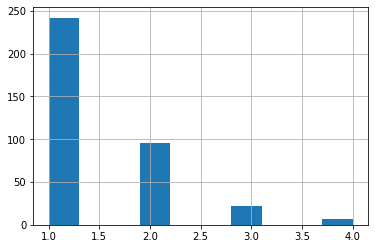

In [50]:
stud.traveltime.hist()
stud.traveltime.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

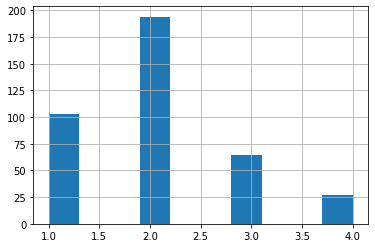

In [51]:
stud.studytime.hist()
stud.studytime.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

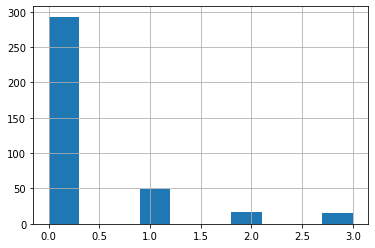

In [52]:
stud.failures.hist()
stud.failures.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

In [54]:
pd.DataFrame(stud.schoolsup.value_counts())
#Имеются незначительные пропуски в данных

,schoolsup
no,335
yes,51


In [56]:
pd.DataFrame(stud.famsup.value_counts())
#Имеются незначительные пропуски в данных

,famsup
yes,219
no,137


In [57]:
pd.DataFrame(stud.paid.value_counts())
#Имеются незначительные пропуски в данных

,paid
no,200
yes,155


In [58]:
pd.DataFrame(stud.activities.value_counts())
#Имеются незначительные пропуски в данных

,activities
yes,195
no,186


In [60]:
pd.DataFrame(stud.nursery.value_counts())
#Имеются незначительные пропуски в данных

,nursery
yes,300
no,79


count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular, dtype: float64

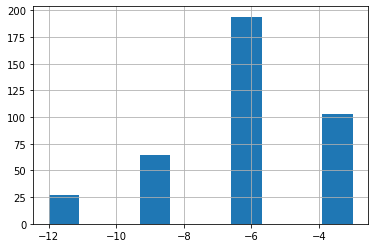

In [61]:
stud.granular.hist()
stud.granular.describe()
#Этот параметр не описан в задании на анализ. В дальнейшем проверем его влияние на успеваемость.

In [62]:
pd.DataFrame(stud.higher.value_counts())
#Имеются незначительные пропуски в данных

,higher
yes,356
no,19


In [63]:
pd.DataFrame(stud.internet.value_counts())
#Имеются незначительные пропуски в данных

,internet
yes,305
no,56


In [65]:
pd.DataFrame(stud.romantic.value_counts())
#Имеются незначительные пропуски в данных

,romantic
no,240
yes,124


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

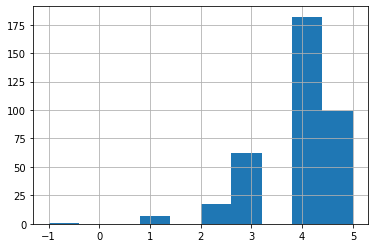

In [67]:
stud.famrel.hist()
stud.famrel.describe()
#Имеется выброс в параметре (отрицательного значения быть не может)

In [105]:
#Заменим ошибочные значения на среднее значение
#(по условию:семейные отношения (от 1 - очень плохо до 5 - очень хорошо) 
def func1(x):
    if x > 0:
        return x
    else:
        return stud.famrel.median()


stud.famrel = stud.famrel.apply(func1)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

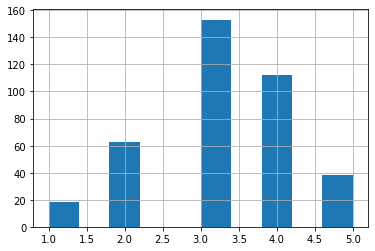

In [68]:
stud.freetime.hist()
stud.freetime.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

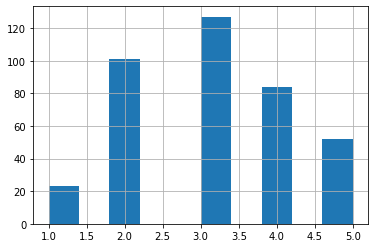

In [69]:
stud.goout.hist()
stud.goout.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

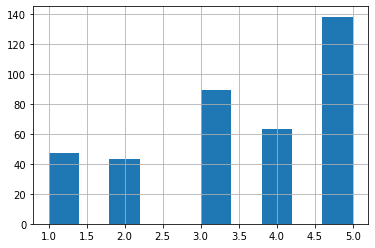

In [70]:
stud.health.hist()
stud.health.describe()
#Как видно, у этого признака распределение без аномалий, выбросов нет.

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

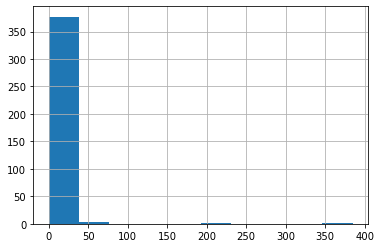

In [71]:
stud.absences.hist()
stud.absences.describe()
#У этого параметра имеется выброс. Возможно какие-то ученики отсутствовали по болезни на протяжении года.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


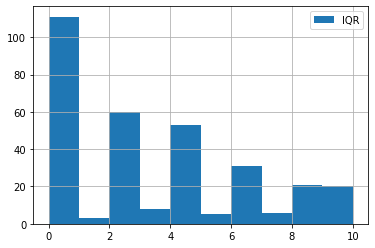

In [110]:
#отберем экстремально низкие и экстремально высокие оценки. Отфильтруем данные:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend()

In [111]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

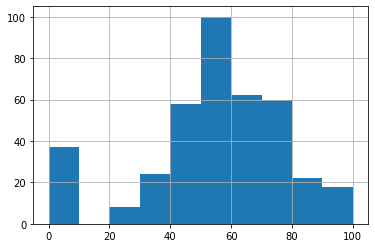

In [73]:
stud.score.hist()
stud.score.describe()
#У параметра успеваемости есть пропуски по некоторым ученикам.

In [76]:
stud.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

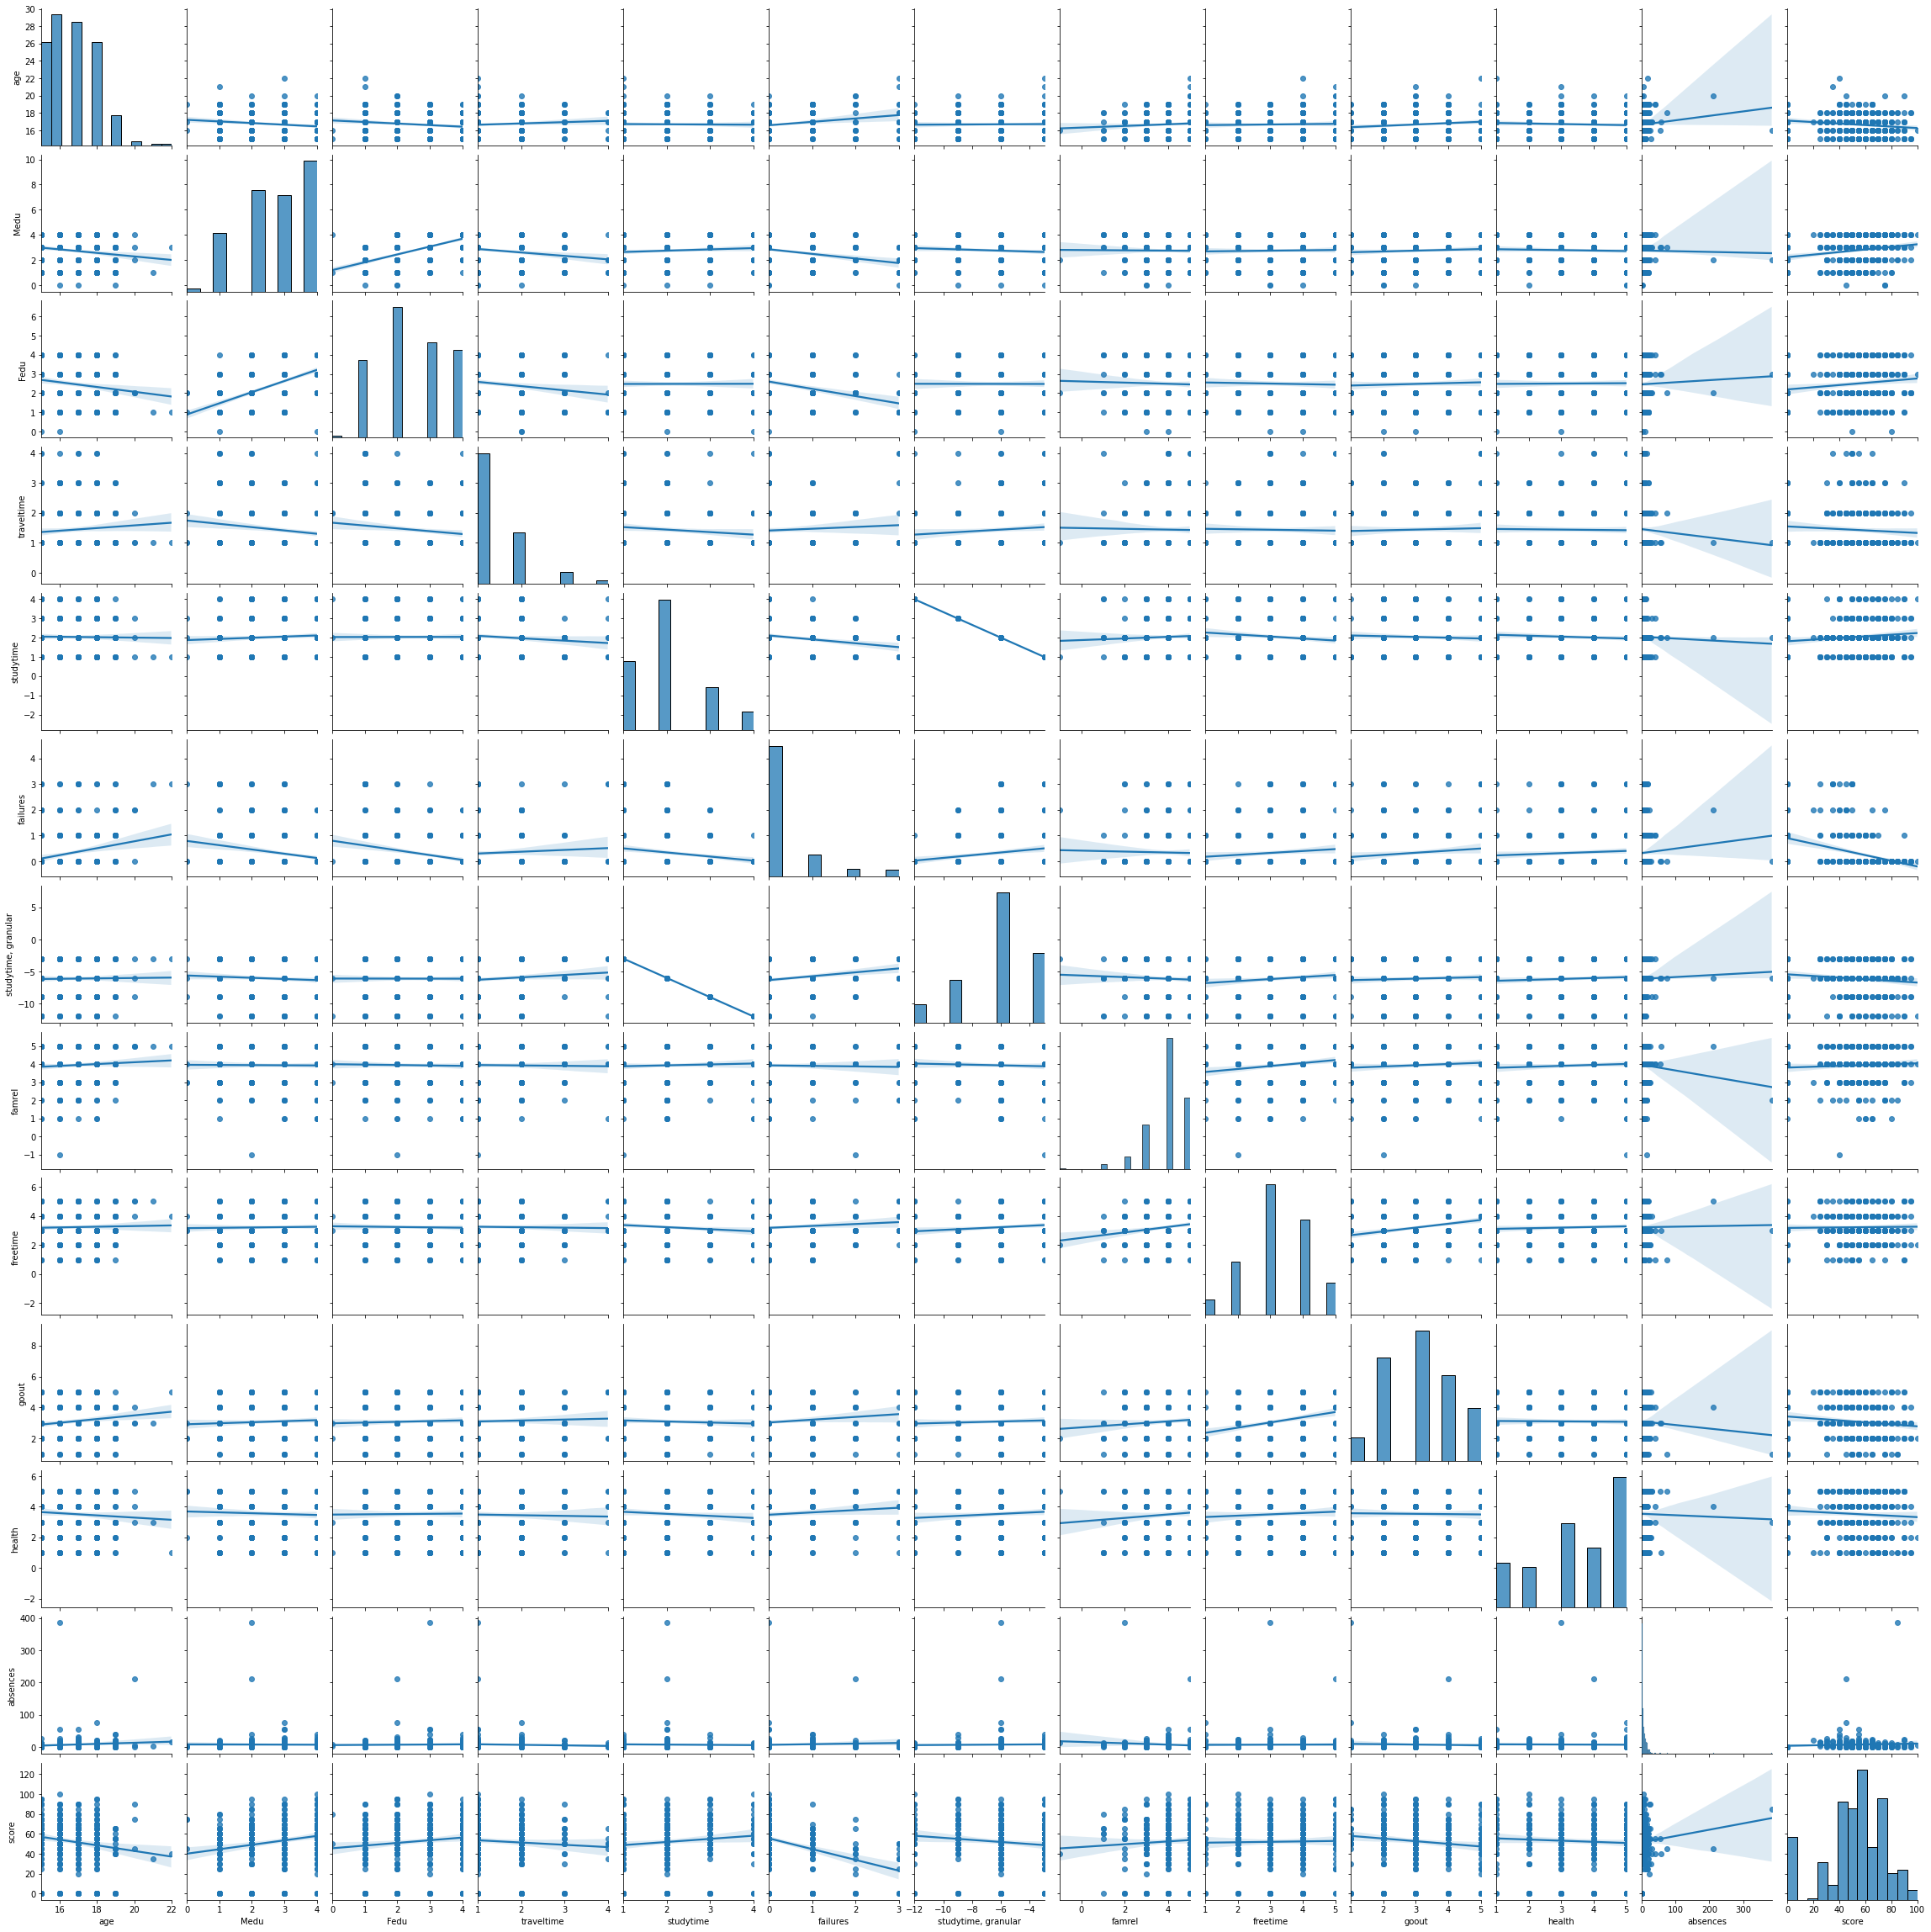

In [82]:
sns.pairplot(stud, kind = 'reg')

In [112]:
round(stud.corr(), 2)
#По результату корреляции можно отобрать наиболее влияющие на 'score' переменные (индекс более 0.15):
#'Age', 'Medu', 'failures'

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.00,-0.18,-0.17,0.09,0.00,0.20,-0.00,0.00,0.06,0.14,-0.07,0.15,-0.16
Medu,-0.18,1.00,0.61,-0.20,0.09,-0.25,-0.09,-0.08,0.03,0.05,-0.05,0.07,0.21
Fedu,-0.17,0.61,1.00,-0.14,-0.01,-0.28,0.01,-0.02,-0.02,0.03,0.01,-0.02,0.11
traveltime,0.09,-0.20,-0.14,1.00,-0.09,0.09,0.09,0.03,-0.01,0.03,-0.01,-0.05,-0.07
studytime,0.00,0.09,-0.01,-0.09,1.00,-0.17,-1.00,0.00,-0.14,-0.03,-0.09,-0.08,0.11
failures,0.20,-0.25,-0.28,0.09,-0.17,1.00,0.17,-0.01,0.10,0.09,0.08,0.08,-0.33
"studytime, granular",-0.00,-0.09,0.01,0.09,-1.00,0.17,1.00,-0.00,0.14,0.03,0.09,0.08,-0.11
famrel,0.00,-0.08,-0.02,0.03,0.00,-0.01,-0.00,1.00,0.03,-0.02,0.04,-0.02,-0.05
freetime,0.06,0.03,-0.02,-0.01,-0.14,0.10,0.14,0.03,1.00,0.29,0.04,0.09,0.03
goout,0.14,0.05,0.03,0.03,-0.03,0.09,0.03,-0.02,0.29,1.00,0.00,0.11,-0.12


In [85]:
#Анализ номинативных переменных по 10 самых частых
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [94]:
#Выделим список колонок с нечисловыми значениями
a = stud.select_dtypes(include=[object])
a.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

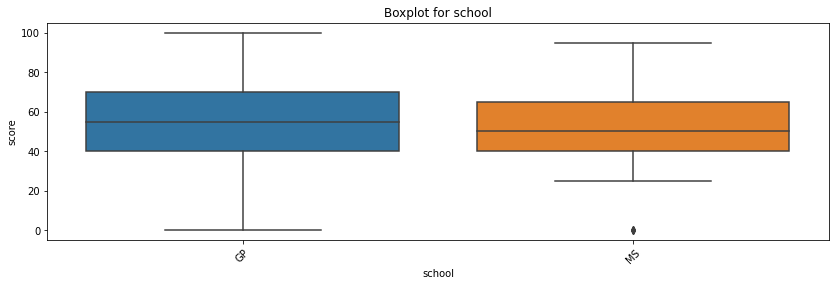

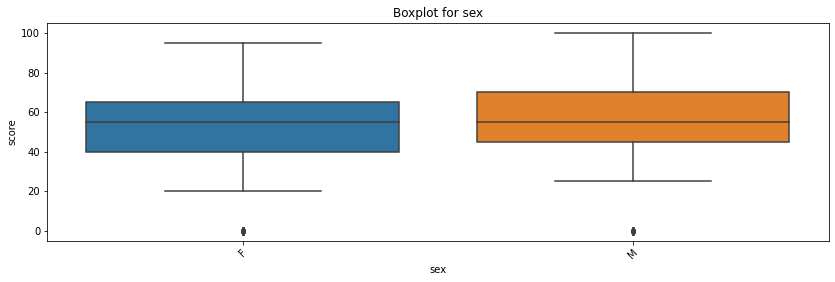

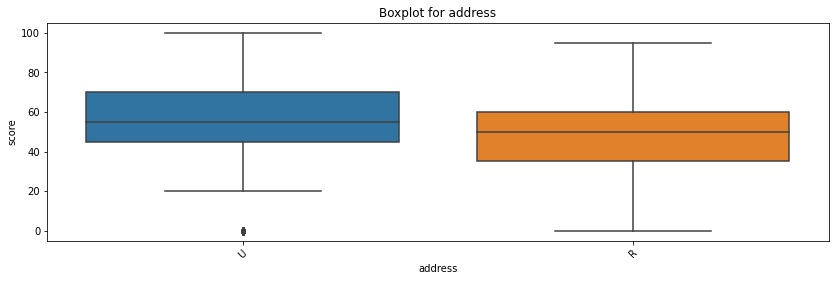

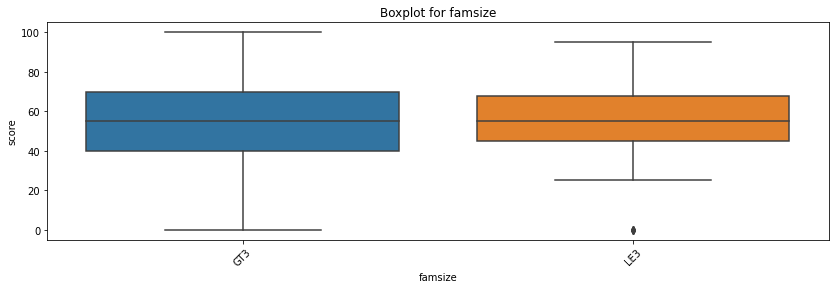

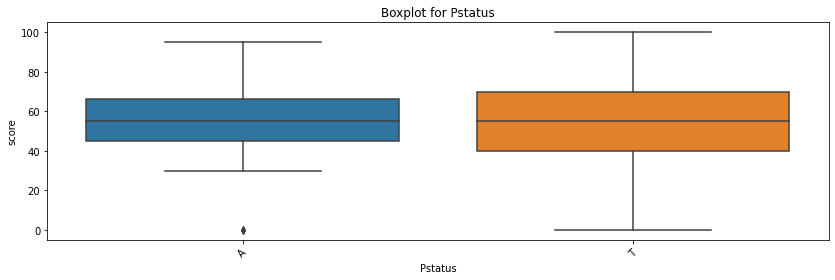

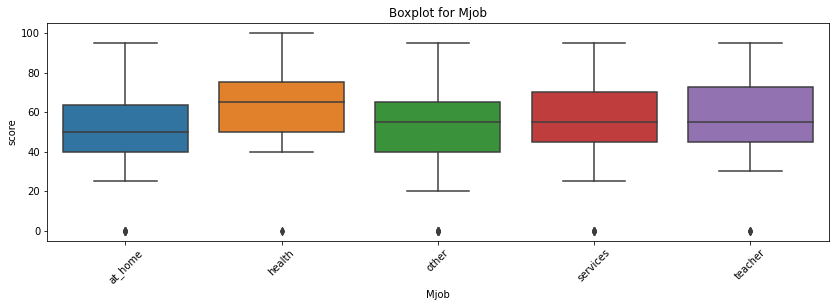

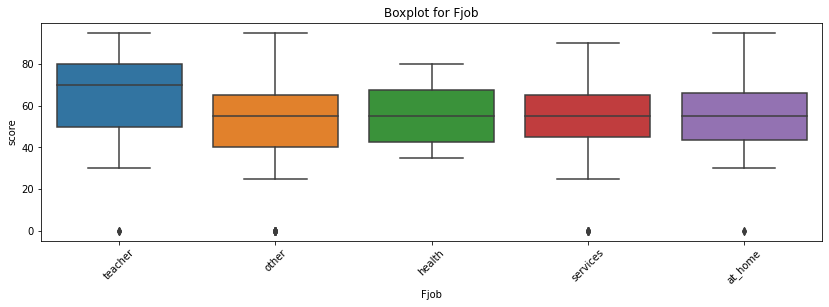

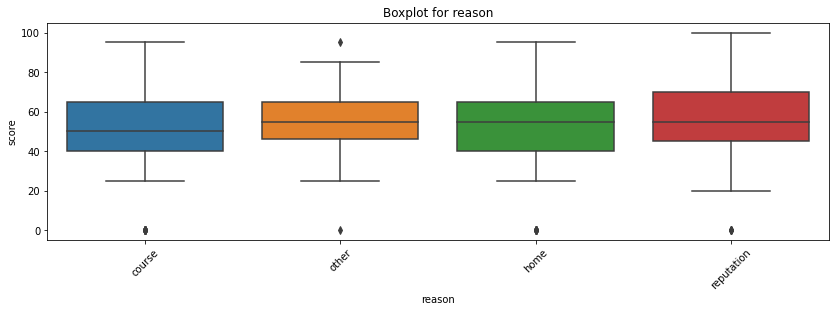

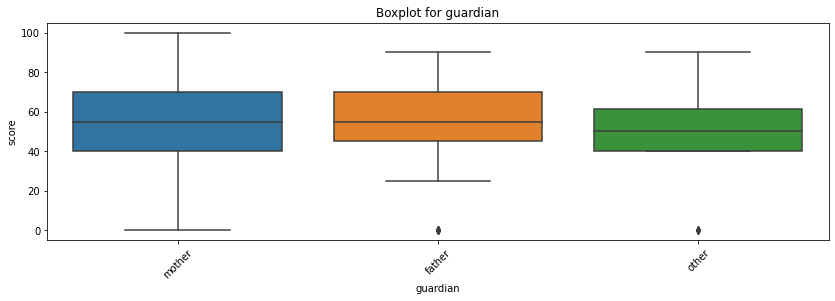

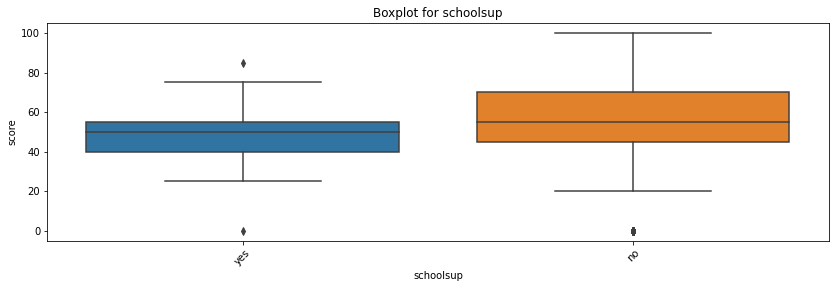

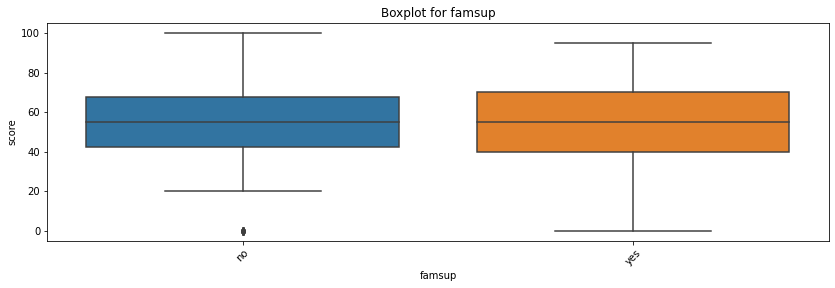

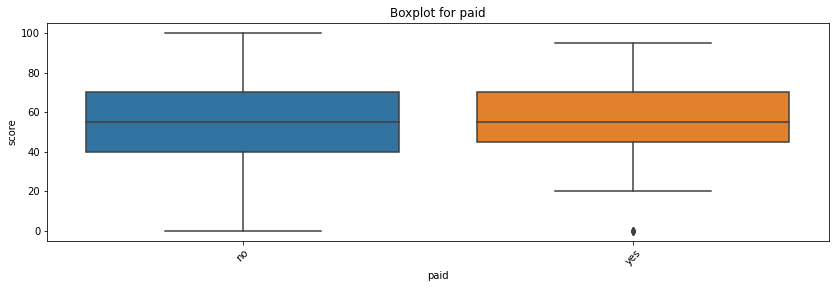

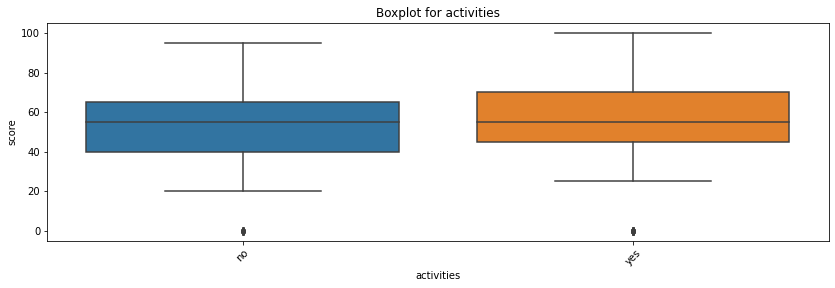

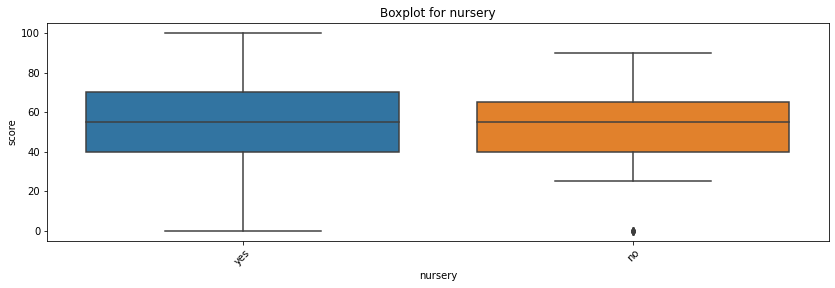

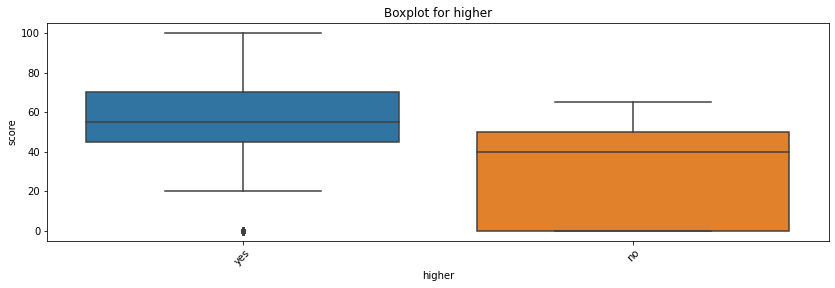

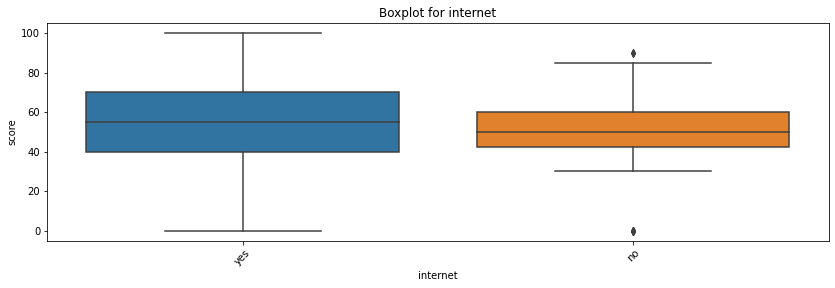

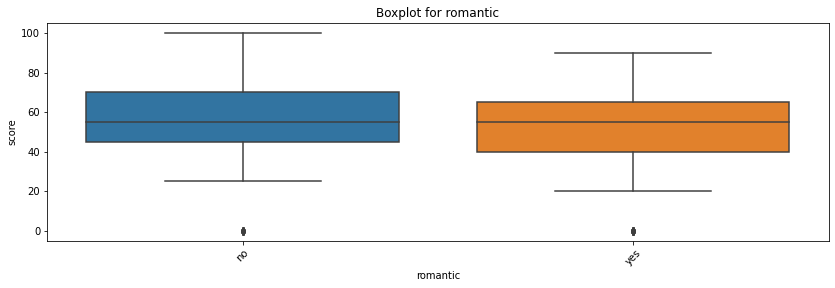

In [95]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [106]:
#Можно выделить влияние на успеваемость следующих столбцов: 'Mjob', 'Fjob', 'higher'
#Проверим это утверждение с помощью теста Стьюдента:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [107]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [109]:
#Как мы видим, серьёзно отличаются параметр Mjob. 
#Оставим эти переменные в датасете для дальнейшего построения модели. 
#Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, 
#это: 'Age', 'Medu', 'failures', 'Mjob'.
stud_for_model = stud.loc[:,['age', 'Medu', 'failures','Mjob']]
stud_for_model.head()

,age,Medu,failures,Mjob
0,18,4.0,0.0,at_home
1,17,1.0,0.0,at_home
2,15,1.0,3.0,at_home
3,15,4.0,0.0,health
4,16,3.0,0.0,other
